# Sentiment Analysis



## Step 1: Exploring the data!



In [1]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


positive reviews:

In [2]:
print(data['train']['pos'][2])

Cinderella is a beautiful young woman who is treated cruelly by her wicked stepmother and stepsisters. One day, a ball is to be held in honor of the prince, but Cinderella has no chance of going, because her stepmother and stepsisters won't let her. With the help of her fairy godmother and her animal friends, she is off to the ball, with the warning to return home by midnight. At the ball she meets the handsome Prince Charming. When the clock strikes midnight, she runs home, leaving behind one of her glass slippers. With the help of her animal friends, her true identity is revealed. She and the prince later get married, and they live happily ever after.<br /><br />Cinderella, released 56 years ago, was a huge box office success, and it continues to charm audiences to this day. It has a well-written script. The characters are memorable. The songs, including "A Dream is A Wish Your Heart Makes", "So This Is Love", and the great "Bibbidi-Bobbidi-Boo", help tell the story. This was my favo

negative sentiment:

In [3]:
print(data['train']['neg'][2])

OK, so Mr. Agrama's company (which is involved in some dubious business with former Italian PM Silvio Berlusconi) produced a horrendous mish-mash by a Mr. Carl Macek.<br /><br />What is this horrendous mish-mash I'm talking about? Well, Macek took three entirely unrelated Japanese sci-fi animated series (namely, Macross, Southern Cross and Mospeada), added TONS of dialogue - believing firmly that the American audience is too dumb to understand the narrative and artistic virtue of silence - , edited the whole lot heavily for violent content, added some metaphysical mumbo jumbo, dubbed it using some of the worst voice actors this side of acting Hell (Reba West's singing was - and still is - unbearable and a total outrage, especially compared to Mrs. Mari Iijima)... And the result was an 85-episode series with hundreds of continuity problems and plot holes.<br /><br />Of course, the mecha were cool to look at (especially those in the "Macross Saga") and the plot parts that remained unscat

In [4]:
# Installing wordcloud
!pip install wordcloud

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


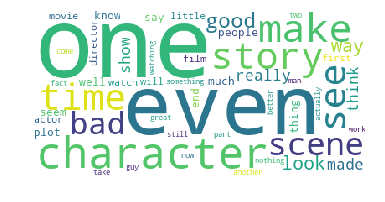

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

### Form training and test sets


In [6]:
print(len(data['train']['neg']))
print(len(data['train']['pos']))
print(len(data['test']['pos']))
print(len(data['test']['neg']))

data["trainCombined"]=data['train']['neg']+data['train']['pos']
data["testCombined"]=data['test']['neg']+data['test']['pos']
print(len(data["trainCombined"]))
print(len(data["testCombined"]))

12500
12500
12500
12500
25000
25000


In [7]:
from sklearn.utils import shuffle

def prepare_imdb_data(data):

    data_train = data['train']['neg']+data['train']['pos']
    data_test = data['test']['neg']+data['test']['pos']
    
    label_train = labels['train']['neg']+labels['train']['pos']
    label_test = labels['test']['neg']+labels['test']['pos']
   
    
    data_train, data_test =shuffle(data_train,data_test, n_samples=2, random_state=69)
    labels_train, labels_test=shuffle(label_train, label_test, n_samples=2, random_state=69)

    
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 2, test = 2


## Preprocessing



### Convert each review to words



In [8]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def review_to_words(review):
  
    text = BeautifulSoup(review, 'html.parser').get_text()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    words = text.split(' ')
    words = [word for word in words if word not in stopwords.words('english')]
    words = [PorterStemmer().stem(w) for w in words]
    
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', '', 'test', '', 'would', 'make', 'great', 'movi', 'review', '']

In [10]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
   

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
At first i didn't think that Ben Affleck could really pull off a funny Christmas movie,, boy was i wrong, my daughter invited me to watch this with her and i was not disappointed at all. James Gandolfini was funny,, i really liked Christina Appelagate, and Catherine O' Hara was good too, the storyline is what really sold me,, i mean,, too put up with family,, at the table for people you only hardly see but once or twice a year,, and probably don't get along with anyway,, you really do need as much alcohol as you're system can stand to deal with Christmas,, so i thought that the premise was good there, buying the family with 250000 dollars, was a little on the far fetched side,, but it turned out to work pretty good for me,, cause it was a riot all the way through, it shows the class struggle of the different families. it has lot's of funny moments, including embarrassing stuff on the computer for a teenag

## Extracting Bag-of-Words features

### Compute Bag-of-Words features


In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib


def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
   
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        
    
        vectorizer = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x, tokenizer=lambda x: x)
        features_train = vectorizer.fit_transform(words_train).toarray()

        features_test = vectorizer.fit_transform(words_test).toarray()
        

        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
    
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['audio', 'plastic', 'provid', 'third', 'bug', 'farc', '1972', 'till']

--- Preprocessed words ---
['kid', '50', '60', 'anyth', 'connect', 'disney', 'definit', 'great', 'happen', 'abl', 'get', 'actor', 'actress', 'want', 'best', 'time', 'somehow', 'disney', 'manag', 'screw', 'thing', 'spite', 'abund', 'resourc', 'disney', 'afford', 'best', 'writer', 'best', 'produc', 'director', 'still', 'screw', 'thing', 'movi', 'crap', 'sad', 'thing', 'suspect', 'disney', 'arrog', 'even', 'know', 'movi', 'good', 'bad', 'due', 'talent', 'actor', 'even', 'give', '3', '10']

--- Bag-of-Words features ---
[0 0 0 ... 0 0 0]

--- Label ---
neg


Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

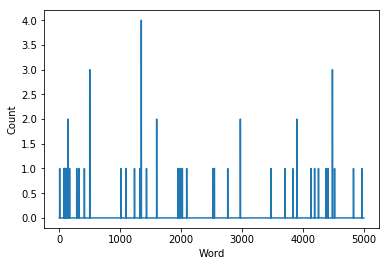

In [12]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()



### Zipf's law


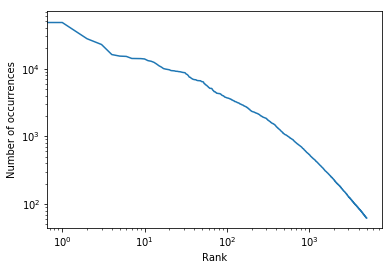

In [13]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()



### Normalize feature vectors



In [ ]:
import sklearn.preprocessing as pr


features_train = pr.normalize(features_train, norm='l2', axis=1)
features_test = pr.normalize(features_test, norm='l2', axis=1)


## Classification using BoW features


In [ ]:
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf1.fit(features_train, labels_train)

# nbs_performance = BinaryClassificationPerformance(clf1.predict(features_train), labels_train, 'nbs')
# nbs_performance.compute_measures()
# print(nbs_performance.performance_measures)


# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))



### Gradient-Boosted Decision Tree classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 50


def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)
    
    clf.fit(X_train,y_train)
    
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(features_train, labels_train),
        clf.score(features_test, labels_test)))

    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

### Adverserial testing



In [ ]:

my_review = "This was a great movie.  I would strongly recommend seeing because I cried it was so emotional and exceptional and amazing.  people loved it when the audienced laughed with the actor."
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'


review = review_to_words(my_review)
vectorizer = CountVectorizer(vocabulary=vocabulary, preprocessor=lambda x: x, tokenizer=lambda x: x)
bitchFace = vectorizer.transform([review]).toarray()


sentPredict = clf2.predict(bitchFace)[0]
print(sentPredict)
print(review)